## Description 

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Reference: https://www.kaggle.com/vikeshkumar/credit-card-fraud-detection-ulb-lg-rf-and-xgb

### Problem Statement

Identify fraud transactions so that customers are not charged for items that they did not purchased.

### 1. Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None                            

from IPython.core.interactiveshell import InteractiveShell         
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.shape

(284807, 31)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2. Data Cleaning

In [8]:
msng = data.isnull().sum()
msng_percnt = (msng/len(data))*100
pd.concat([msng,msng_percnt], axis=1, keys=['Missing Values','Missing Percentage'])

,Missing Values,Missing Percentage
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


In [9]:
data.drop_duplicates(keep='first',ignore_index=True,inplace=True)
data.shape

(283726, 31)

### 3. Data Analysis

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train,test = train_test_split(data,test_size=0.2, shuffle=True,random_state=10)

train.shape
test.shape

(226980, 31)

(56746, 31)

In [12]:
X_train = train.drop(['Class'],axis=1)
Y_train = train['Class']
X_test = test.drop(['Class'],axis=1)
Y_test = test['Class']

X_train.shape
Y_train.shape
X_test.shape
Y_test.shape

(226980, 30)

(226980,)

(56746, 30)

(56746,)

In [13]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<Figure size 1224x648 with 0 Axes>

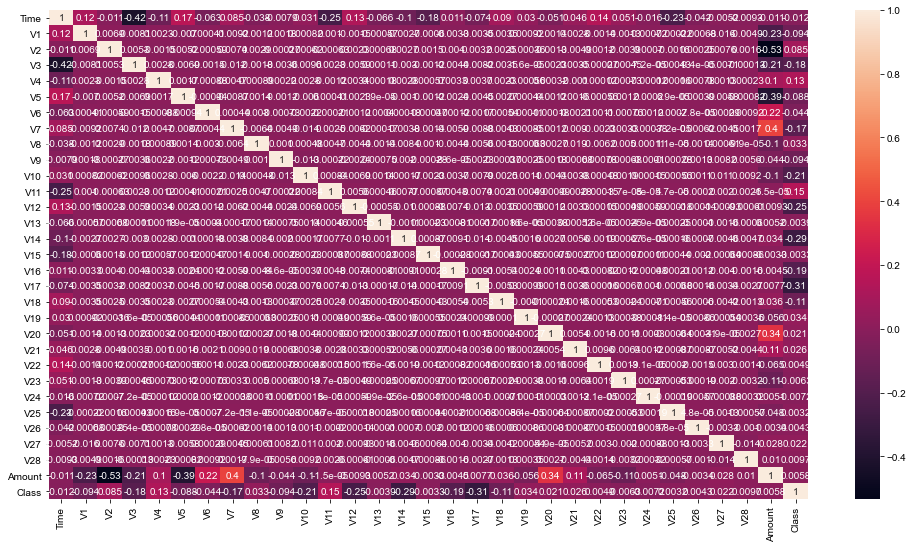

In [14]:
plt.figure(figsize=(17,9))
sns.heatmap(data.corr(), annot=True)
sns.set(font_scale=0.7)

In [15]:
data['Class'].value_counts(normalize=True)*100

0    99.83329
1     0.16671
Name: Class, dtype: float64

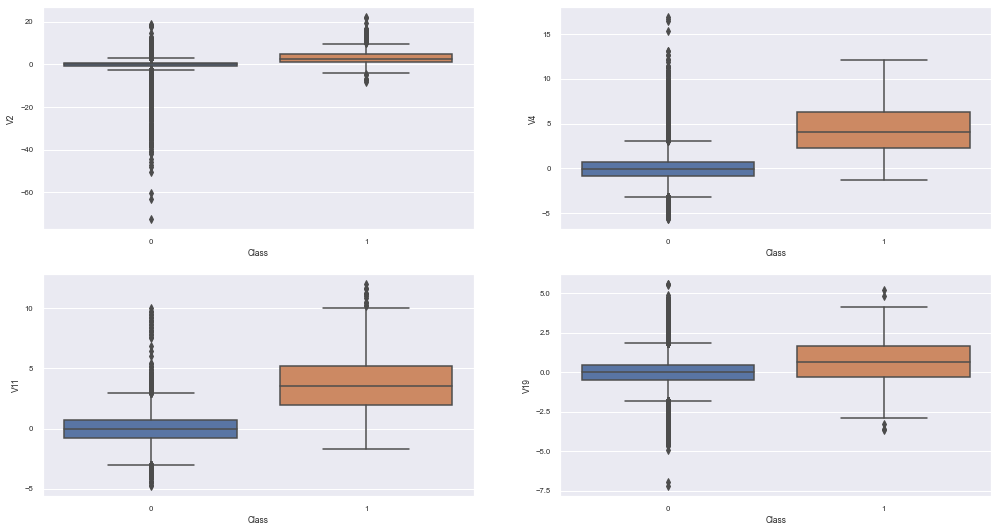

In [16]:
fig, axes=plt.subplots(ncols=2, nrows=2, figsize=(17,9))
sns.set(font_scale=1.5)

sns.boxplot(x='Class',y='V2',data=data,ax=axes[0,0])
sns.boxplot(x='Class',y='V4',data=data,ax=axes[0,1])
sns.boxplot(x='Class',y='V11',data=data,ax=axes[1,0])
sns.boxplot(x='Class',y='V19',data=data,ax=axes[1,1])

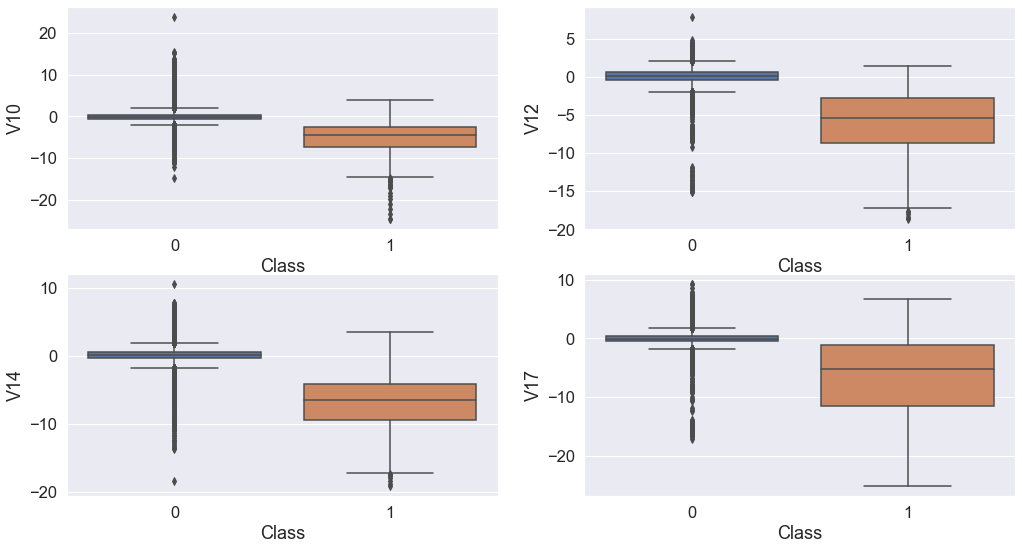

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(17,9))
sns.set(font_scale=1.5)

sns.boxplot(x='Class', y='V10', data=data, ax=axes[0,0])
sns.boxplot(x='Class', y='V12', data=data, ax=axes[0,1])
sns.boxplot(x='Class', y='V14', data=data,  ax=axes[1,0])
sns.boxplot(x='Class', y='V17', data=data, ax=axes[1,1])

In [18]:
data['Amount'].describe()
# Amount is highly left skewed. Using log for Amount.

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

<Figure size 1224x648 with 0 Axes>

Text(0, 0.5, 'Amount (in log)')

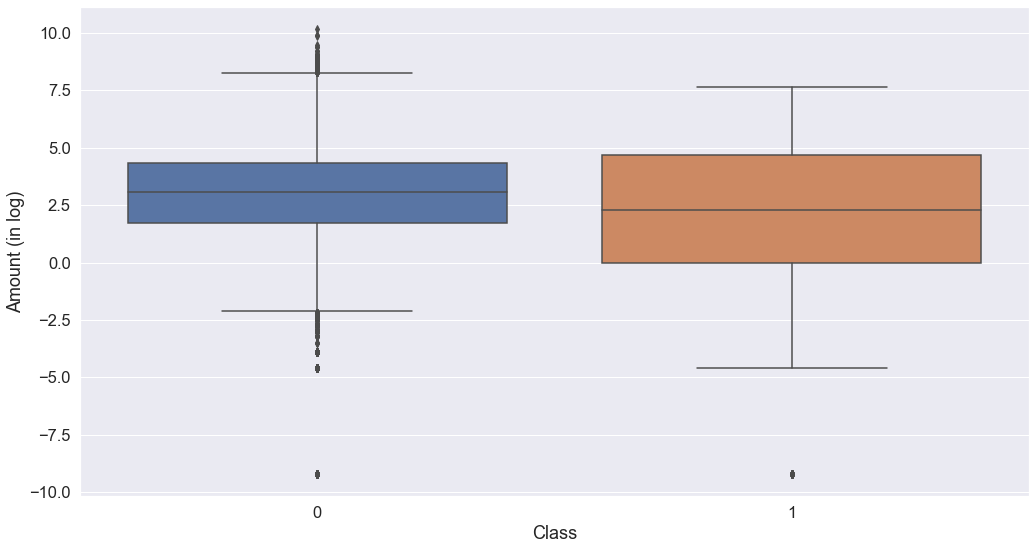

In [19]:
amount_log = np.log(data['Amount'] + 0.0001)

plt.figure(figsize=(17,9))
sns.boxplot(x=data['Class'],y=amount_log)
plt.ylabel('Amount (in log)')

# Transaction amount for fraud transaction is less than the legitimate transaction mostly.

### 4, Modeling

#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# creating a RF model with default Parameters
rdf = RandomForestClassifier() 

# fitting the model on train
rdf.fit(X_train,Y_train)

RandomForestClassifier()

In [22]:
rdf_prd_trn = rdf.predict(X_train)
rdf_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix

labels = ['Legitimate Transactions','Fraud Transactions']
pd.DataFrame(confusion_matrix(Y_train,rdf_prd_trn), index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,226592,0
Fraud Transactions,0,388


In [24]:
from sklearn.metrics import accuracy_score

print('Accuracy of Random forest on train :', accuracy_score(Y_train,rdf_prd_trn))

Accuracy of Random forest on train : 1.0


In [25]:
rdf_prd_tst = rdf.predict(X_test)
rdf_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
pd.DataFrame(confusion_matrix(Y_test,rdf_prd_tst),index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,56656,5
Fraud Transactions,25,60


In [27]:
print('Accuracy of Random forest on test :', accuracy_score(Y_test,rdf_prd_tst))

Accuracy of Random forest on test : 0.9994713283755683


In [28]:
from sklearn.metrics import classification_report

# classification report for Random Forest with default parameters
print(classification_report(Y_test,rdf_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.92      0.71      0.80        85

    accuracy                           1.00     56746
   macro avg       0.96      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



#### Feature Importance

In [29]:
# defining a function to plot feature importance

def plot_feature_importance(model,algo):
    
    # finding the important features
    DF = pd.DataFrame({'Feature_Name':list(X_train),'Feature_importance':model.feature_importances_})
    DF.sort_values(by='Feature_importance', ascending=False,inplace=True)
    
    # plotting the feature importance
    plt.figure(figsize=(17,9))
    sns.barplot(x=DF['Feature_importance'], y=DF['Feature_Name'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(algo+"'s Feature Importance")

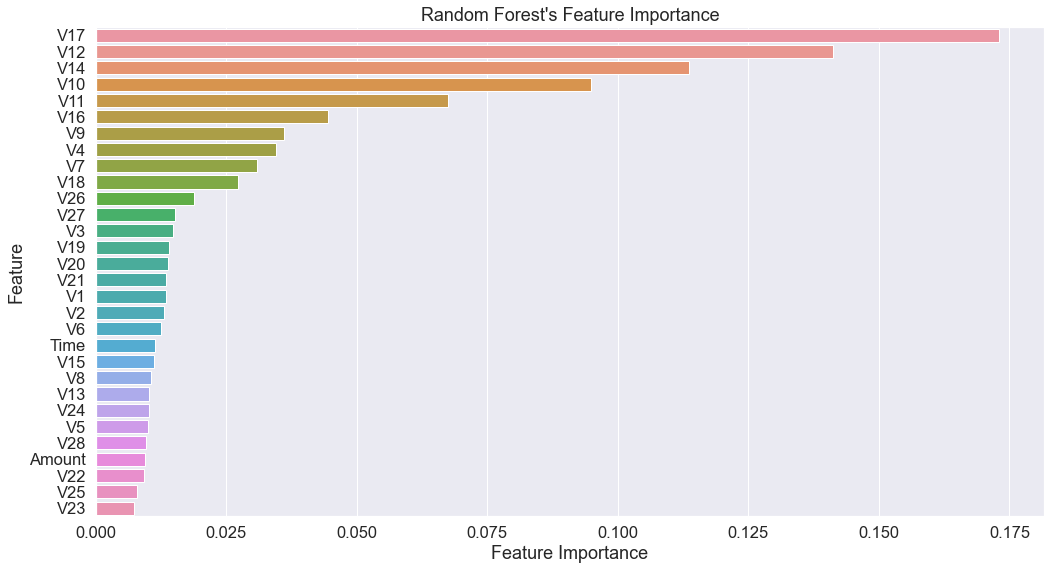

In [30]:
plot_feature_importance(rdf,'Random Forest')

In [31]:
# droping insignificant features from random forest

X_train_RF = X_train.drop(['V23','V25','V5','V24','V22','Time','V19','Amount','V13','V28','V15','V20','V8','V2',
                           'V27','V6','V1','V21','V26'],axis=1)

In [32]:
rdf_imp = RandomForestClassifier()

rdf_imp.fit(X_train_RF,Y_train)

RandomForestClassifier()

In [33]:
rdf_imp_prd_trn = rdf_imp.predict(X_train_RF)
rdf_imp_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
pd.DataFrame(confusion_matrix(Y_train,rdf_imp_prd_trn),index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,226592,0
Fraud Transactions,0,388


In [35]:
print('Accuracy of Random forest (only significant features) on train :', accuracy_score(Y_train,rdf_imp_prd_trn))

Accuracy of Random forest (only significant features) on train : 1.0


In [36]:
# droping insignificant features from test
X_test_RF = X_test.drop(['V23','V25','V5','V24','V22','Time','V19','Amount','V13','V28','V15','V20','V8','V2',
                           'V27','V6','V1','V21','V26'],axis=1)

In [37]:
rdf_imp_prd_tst = rdf_imp.predict(X_test_RF)
rdf_imp_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
pd.DataFrame(confusion_matrix(Y_test,rdf_imp_prd_tst),index=labels,columns=labels)

,Legitimate Transactions,Fraud Transactions
Legitimate Transactions,56655,6
Fraud Transactions,25,60


In [39]:
print('Accuracy of Random forest (only significant features) on test :', accuracy_score(Y_test,rdf_imp_prd_tst))

Accuracy of Random forest (only significant features) on test : 0.9994537059880872


In [40]:
# classification report for Random forest after removing insignificant features
print(classification_report(Y_test,rdf_imp_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.91      0.71      0.79        85

    accuracy                           1.00     56746
   macro avg       0.95      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [41]:
from sklearn.metrics import roc_auc_score,roc_curve

In [42]:
rdf_tst_proba = rdf.predict_proba(X_test)[:,1]

In [43]:
print('AUC value for Random Forest:',roc_auc_score(Y_test,rdf_tst_proba))

AUC value for Random Forest: 0.9453779287963399


In [44]:
fbr,tbr,thrs = roc_curve(Y_test,rdf_tst_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Postive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

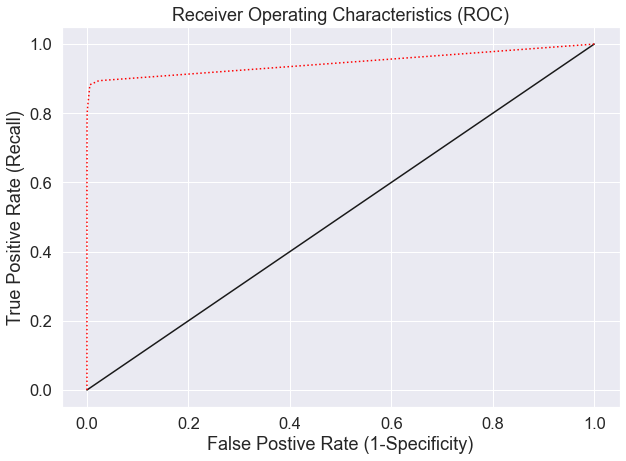

In [45]:
# Plotting the AUC curve
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(fbr,tbr,':',color='red')
plt.xlabel('False Postive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

#### XGBOOST

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier() # model with default parameters

In [48]:
xgb.fit(X_train,Y_train) # training the model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
xgb_prd_trn = xgb.predict(X_train)
xgb_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
print(pd.DataFrame(confusion_matrix(Y_train,xgb_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226592                   0
Fraud Transactions                             0                 388


In [51]:
from sklearn.metrics import accuracy_score
print('Accuracy of XGboost on train :', accuracy_score(Y_train,xgb_prd_trn))

Accuracy of XGboost on train : 1.0


In [52]:
xgb_prd_tst = xgb.predict(X_test)
xgb_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(pd.DataFrame(confusion_matrix(Y_test,xgb_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56657                   4
Fraud Transactions                            26                  59


In [54]:
print('Accuracy of XGboost on test :', accuracy_score(Y_test,xgb_prd_tst))

Accuracy of XGboost on test : 0.9994713283755683


In [55]:
print('AUC score for XGboost:', roc_auc_score(Y_test,xgb_prd_tst))

AUC score for XGboost: 0.847023525882


In [56]:
print(classification_report(Y_test,xgb_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.94      0.69      0.80        85

    accuracy                           1.00     56746
   macro avg       0.97      0.85      0.90     56746
weighted avg       1.00      1.00      1.00     56746



#### SMOTE

In [57]:
# SMOTE works like KNN does. So, all the features to be used needs to be scaled.
# All the features are result of PCA transaformation except Time and Amount. Doing feature scaling only for TIme & amount.

from sklearn.preprocessing import StandardScaler

X_train_scald = X_train.copy()               # copy of X_train
col_to_scald = ['Time','Amount']             # features to be scaled
featr = X_train_scald[col_to_scald]

scalr = StandardScaler().fit(featr)          # fitting StandardScaler

In [58]:
x_trn = scalr.transform(featr)               # transforming X_train
X_train_scald[col_to_scald] = x_trn

In [59]:
X_train_scald.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
158924,0.374899,-2.955617,-1.807269,0.288428,1.043848,-0.657473,-0.328328,0.872212,0.181270,0.070983,-0.903200,-1.299470,-0.336455,-0.480945,0.408289,0.661661,0.798935,-0.666928,0.565374,-0.974568,-0.352967,0.296883,0.696652,-0.666659,0.058703,-0.352203,-0.613740,0.548884,-0.634153,1.458825
85179,-0.717153,-0.926780,1.257414,1.337493,-0.251241,1.120411,-0.649394,1.423179,-0.330488,-0.939652,-0.031371,1.042365,0.685021,0.370909,0.208075,-0.547373,0.068805,-1.016245,0.217294,-0.291041,0.102706,0.002682,0.207431,-0.577729,0.030259,0.904522,-0.392648,-0.032085,-0.125592,-0.348298
202437,0.840032,2.015262,-0.097851,-1.586770,1.055784,0.746359,0.497370,-0.018712,0.066781,0.514171,0.346382,-0.336309,0.598495,-0.416983,0.333802,-1.263772,-0.152080,-0.691639,0.478855,0.344593,-0.242613,0.162511,0.704555,-0.128932,-0.189097,0.520441,-0.366796,0.005519,-0.067153,-0.312125
48821,-1.073458,-6.466280,-5.120985,0.881461,-0.412296,0.023292,0.302638,0.745833,-0.799876,0.722063,1.566295,1.243945,0.242032,0.838817,-2.020204,-0.968181,1.338793,-0.174169,-1.670853,1.042268,-3.251675,-1.191141,0.793610,1.395308,-0.153513,1.115056,-0.264281,-1.170124,2.766348,0.655465
184562,0.669203,2.119849,-1.472927,-1.080122,-1.893983,0.725872,4.119072,-2.314822,1.189868,0.474292,0.703182,-0.094368,-0.398616,0.312729,-0.700213,1.033377,1.579846,-0.191958,-0.815605,0.057942,0.048238,0.418236,1.222180,0.242711,0.738473,-0.376150,-0.069699,0.078010,-0.039317,-0.351753


In [60]:
print('Total no. of Fraud Transaction in train data :',sum(Y_train==1))
print('Total no of Legitimate Transaction in train data :',sum(Y_train==0))

Total no. of Fraud Transaction in train data : 388
Total no of Legitimate Transaction in train data : 226592


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=20, n_jobs=-1)

In [63]:
X_train_smote,Y_train_smote = smote.fit_sample(X_train_scald,Y_train)

In [64]:
print('Total no. of Fraud Transaction in train data :',sum(Y_train_smote==1))
print('Total no. of Legitimate Transaction in train data :',sum(Y_train_smote==0))

Total no. of Fraud Transaction in train data : 226592
Total no. of Legitimate Transaction in train data : 226592


#### XGboost using SMOTE

In [65]:
xgb_smote = XGBClassifier()

In [66]:
xgb_smote.fit(X_train_smote,Y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb_smote_prd_trn = xgb_smote.predict(X_train_smote)
xgb_smote_prd_trn

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [68]:
print(pd.DataFrame(confusion_matrix(Y_train_smote,xgb_smote_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226591                   1
Fraud Transactions                             0              226592


In [69]:
print('Accuracy of XGboost using SMOTE on train :', accuracy_score(Y_train_smote,xgb_smote_prd_trn))

Accuracy of XGboost using SMOTE on train : 0.999997793390764


In [70]:
X_test_scaled = X_test.copy()
tst_feat = X_test_scaled[col_to_scald]          
x_tst = scalr.transform(tst_feat)
X_test_scaled[col_to_scald] = x_tst

In [71]:
X_test_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
119483,-0.404157,-0.868316,0.310385,2.440775,-0.923164,-0.124800,0.116584,0.070864,0.434674,0.291963,-1.047113,0.946985,0.911082,-0.581674,-0.312058,-1.516148,0.558790,-0.703110,-0.244147,-1.759019,-0.287490,0.109391,0.346733,-0.058498,0.226926,-0.390286,-0.043309,0.097176,0.123567,-0.328484
17752,-1.388646,-0.797899,1.924714,-0.496497,0.649641,0.559371,0.020042,-0.015066,-3.396142,-0.289837,0.469879,-1.204169,0.272353,0.673993,0.421552,0.598156,-0.306965,-0.237618,0.125020,0.634913,-0.588350,3.122428,-0.537665,0.327733,-0.474439,-0.504046,-0.338321,0.615687,0.239678,-0.263841
185301,0.676010,-0.772459,0.927688,-0.587299,-2.056678,2.620595,3.670107,-0.013384,0.929972,0.995876,-0.370534,0.331056,-0.173121,-0.320220,-1.635131,0.915730,0.419224,0.148053,0.202274,-0.537258,0.418465,-0.377347,-0.767952,-0.017241,0.553453,-0.066833,-0.264769,0.217343,-0.002995,-0.341151
21013,-1.335454,-2.470088,1.445333,1.449623,1.991840,1.299102,2.278487,1.572548,-0.616953,0.890520,4.830925,2.979414,0.286641,0.221534,-1.442123,1.994828,-1.737175,0.132407,-1.757604,-0.705283,1.362997,-0.561796,0.758427,-0.232501,-1.015471,-0.510158,0.037589,-0.230830,-0.679720,-0.049778
247171,1.242679,2.075014,-1.331194,0.257760,-0.715151,-1.496807,0.570541,-1.781122,0.369112,0.748240,0.668248,0.397343,0.519973,0.039952,-1.034241,-1.699330,1.105779,0.241920,-0.789742,1.094459,-0.031798,0.183021,0.780388,0.269328,0.797639,-0.357503,-0.244888,0.054289,-0.040469,-0.347861


In [72]:
xgb_smote_prd_tst = xgb_smote.predict(X_test_scaled)
xgb_smote_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
print(pd.DataFrame(confusion_matrix(Y_test,xgb_smote_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56644                  17
Fraud Transactions                            17                  68


In [74]:
print('Accuracy of XGboost using SMOTE on test :', accuracy_score(Y_test,xgb_smote_prd_tst))

Accuracy of XGboost using SMOTE on test : 0.9994008388256441


In [75]:
print(classification_report(Y_test,xgb_smote_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.80      0.80      0.80        85

    accuracy                           1.00     56746
   macro avg       0.90      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [76]:
print('AUC score for XGboost using SMOTE:',roc_auc_score(Y_test,xgb_smote_prd_tst))

AUC score for XGboost using SMOTE: 0.8998499849984999


In [77]:
xgb_proba = xgb_smote.predict_proba(X_test)[:,1]

In [78]:
xgb_fbr, xgb_tbr, xgb_thrs = roc_curve(Y_test,xgb_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC) ')

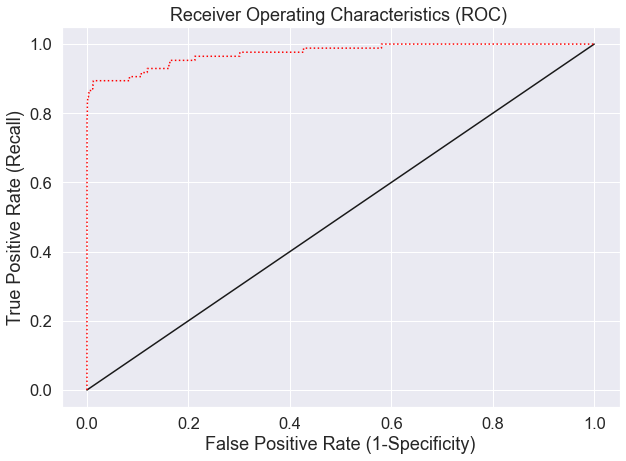

In [79]:
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(xgb_fbr,xgb_tbr,':', color='red')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC) ')

#### Hyperparameter Tuning for XGBOOST

In [80]:
# Parameters to be tuned
xgb_param = {'n_estimators':[200,250,300],            # no. of iteation or tree
             'learning_rate':[0.20,0.30,0.40],        # learning rate 
             'max_depth':[3,4,5,6],                   # max depth of a tree
             'min_child_weight':[1,2,3,4],            # minimum sum of weights of all observations
             'gamma':[0.1,0.2,0.3],                   # minimum loss reduction required 
             'colsample_bytree':[0.2,0.3,0.5],        # fraction of random columns  
             'booster':['gbtree'],                    # gbtree: tree-based model
             'objective':['binary:logistic'],         # binary classification prblm
             'tree_method':['gpu_hist']}              # to use GPU accelarator

In [81]:
from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(estimator=XGBClassifier(),
                        param_grid=xgb_param,
                        scoring='roc_auc',
                        cv=3,
                        n_jobs=-1,
                        verbose=1)

In [82]:
xgb_grid.fit(X_train,Y_train)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3888 out of 3888 | elapsed:  9.0min finished


[00:51:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:207: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [00:51:29] C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:459: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [84]:
xgb_grid.best_params_  

{'booster': 'gbtree',
 'colsample_bytree': 0.2,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'objective': 'binary:logistic',
 'tree_method': 'gpu_hist'}

#### XGboost best fit model

In [85]:
xgb_bst = XGBClassifier(n_estimators=200,
                        max_depth=6,
                        learning_rate=0.3,
                        colsample_bytree=0.5,  
                        gamma=0.1,
                        min_child_weight=1,
                        objective='binary:logistic',
                        n_jobs=-1,
                        booster='gbtree') 

In [86]:
xgb_bst.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Feature Importance

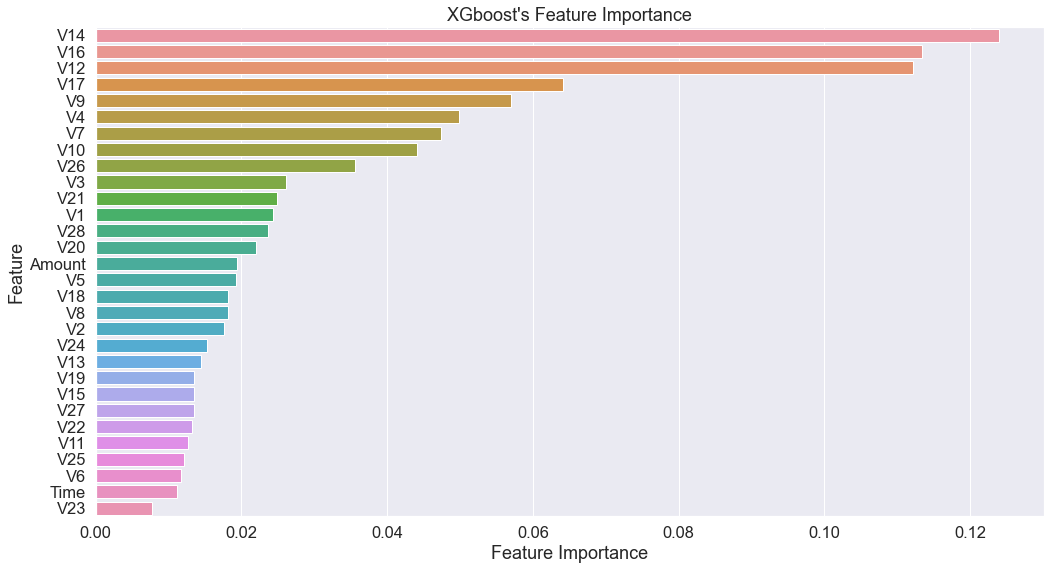

In [87]:
plot_feature_importance(xgb_bst,'XGboost')

In [88]:
xgb_bst_prd_trn = xgb_bst.predict(X_train)
xgb_bst_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
print(pd.DataFrame(confusion_matrix(Y_train,xgb_bst_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226592                   0
Fraud Transactions                             0                 388


In [93]:
xgb_bst_prd_tst = xgb_bst.predict(X_test)
xgb_bst_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
print(pd.DataFrame(confusion_matrix(Y_test,xgb_bst_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56658                   3
Fraud Transactions                            25                  60


In [95]:
# Classificatio report for XGBoost after parameter tuning
print(classification_report(Y_test,xgb_bst_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.95      0.71      0.81        85

    accuracy                           1.00     56746
   macro avg       0.98      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [96]:
print('Accuracy of XGboost after parameter tuning on test :', accuracy_score(Y_test,xgb_bst_prd_tst))

Accuracy of XGboost after parameter tuning on test : 0.9995065731505305


In [97]:
xgb_bst_proba = xgb_bst.predict_proba(X_test)[:,1]

In [98]:
xgb_bst_fpr, xgb_bst_tpr, xgb_bst_thrs = roc_curve(Y_test,xgb_bst_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (1 - Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

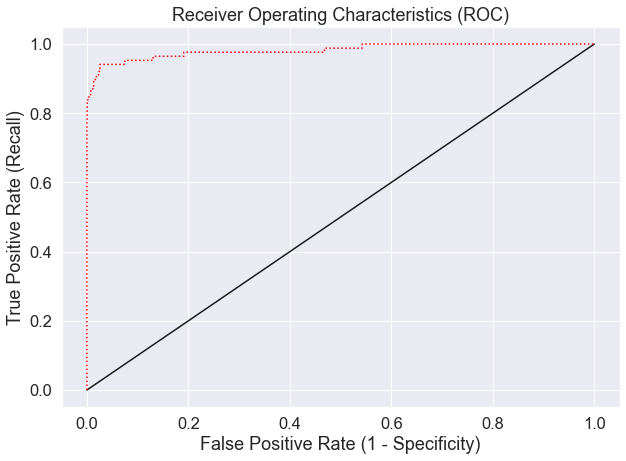

In [99]:
# plotting AUC curve
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(xgb_bst_fpr, xgb_bst_tpr,':',color='red')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

In [100]:
print('AUC score for XGboost after parameter tuning :', roc_auc_score(Y_test,xgb_bst_proba))

AUC score for XGboost after parameter tuning : 0.981854725264914


In [101]:
# Best fit parameters for XGboost SMOTE
xgb_bst_SMOTE = XGBClassifier(n_estimators=200,
                              max_depth=6,
                              learning_rate=0.3,
                              colsample_bytree=0.5,
                              gamma=0.1,
                              min_child_weight=1,
                              objective='binary:logistic',
                              n_jobs=-1,
                              booster='gbtree')

In [102]:
xgb_bst_SMOTE.fit(X_train_smote,Y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
xgb_bst_SMOTE_prd_trn = xgb_bst_SMOTE.predict(X_train_smote)
xgb_bst_SMOTE_prd_trn

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [104]:
print(pd.DataFrame(confusion_matrix(Y_train_smote,xgb_bst_SMOTE_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226592                   0
Fraud Transactions                             0              226592


In [105]:
xgb_bst_SMOTE_prd_tst = xgb_bst_SMOTE.predict(X_test)
xgb_bst_SMOTE_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
print(pd.DataFrame(confusion_matrix(Y_test,xgb_bst_SMOTE_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56652                   9
Fraud Transactions                            20                  65


In [107]:
print(classification_report(Y_test,xgb_bst_SMOTE_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.88      0.76      0.82        85

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [108]:
print('Accuracy for XGboost using SMOTE :', accuracy_score(Y_test,xgb_bst_SMOTE_prd_tst))

Accuracy for XGboost using SMOTE : 0.9994889507630493


In [109]:
xgb_bst_SMOTE_proba = xgb_bst_SMOTE.predict_proba(X_test)[:,1]
xgb_bst_SMOTE_proba

array([1.4724698e-09, 2.7151418e-07, 3.9602813e-07, ..., 2.2830058e-07,
       5.1357773e-07, 1.9516041e-07], dtype=float32)

In [110]:
XGB_fpr, XGB_tpr, XGB_thres = roc_curve(Y_test,xgb_bst_SMOTE_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

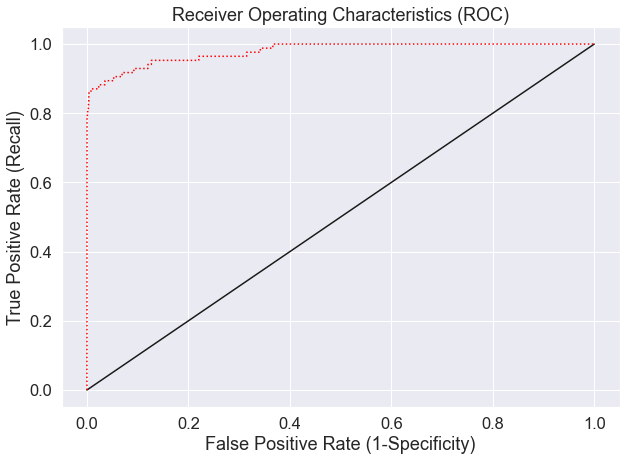

In [111]:
# Potting AUC curve
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(XGB_fpr, XGB_tpr, ':', color='red')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

In [112]:
print('AUC score for XGboost using SMOTE :', roc_auc_score(Y_test,xgb_bst_SMOTE_proba))

AUC score for XGboost using SMOTE : 0.978929380827356


#### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log_reg = LogisticRegression()

In [115]:
log_reg.fit(X_train_scald,Y_train)

LogisticRegression()

In [117]:
log_reg_prd_trn = log_reg.predict(X_train_scald)
log_reg_prd_trn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
print(pd.DataFrame(confusion_matrix(Y_train,log_reg_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   226557                  35
Fraud Transactions                           149                 239


In [119]:
print('Accuracy of Logistic Regression on train:', accuracy_score(Y_train,log_reg_prd_trn))

Accuracy of Logistic Regression on train: 0.9991893558903868


In [120]:
log_reg_prd_tst = log_reg.predict(X_test_scaled)
log_reg_prd_tst

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
print(pd.DataFrame(confusion_matrix(Y_test, log_reg_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    56655                   6
Fraud Transactions                            41                  44


In [122]:
print('Accuracy of Logistic Regression on test:', accuracy_score(Y_test,log_reg_prd_tst))

Accuracy of Logistic Regression on test: 0.9991717477883904


In [123]:
# classification report for Logistic Regression with default parameters
print(classification_report(Y_test,log_reg_prd_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.88      0.52      0.65        85

    accuracy                           1.00     56746
   macro avg       0.94      0.76      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [124]:
print('AUC score of Logistic Regression on test:', roc_auc_score(Y_test,log_reg_prd_tst))

AUC score of Logistic Regression on test: 0.7587705829406469


#### Logistic Regression using SMOTE

In [126]:
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote,Y_train_smote)
log_reg_smote_prd_trn = log_reg_smote.predict(X_train_smote)

LogisticRegression()

In [127]:
print(pd.DataFrame(confusion_matrix(Y_train_smote,log_reg_smote_prd_trn), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                   221080                5512
Fraud Transactions                         17669              208923


In [128]:
print('Accuracy of logistic regression using SMOTE :', accuracy_score(Y_train_smote,log_reg_smote_prd_trn))

Accuracy of logistic regression using SMOTE : 0.9488485913006638


In [129]:
print('AUC score for Logistic Regression using SMOTE :',roc_auc_score(Y_train_smote,log_reg_smote_prd_trn))

AUC score for Logistic Regression using SMOTE : 0.9488485913006637


In [130]:
log_reg_smote_prd_tst = log_reg_smote.predict(X_test_scaled)
log_reg_smote_prd_tst

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [131]:
print(pd.DataFrame(confusion_matrix(Y_test,log_reg_smote_prd_tst), index=labels, columns=labels))

                         Legitimate Transactions  Fraud Transactions
Legitimate Transactions                    55294                1367
Fraud Transactions                             9                  76


In [132]:
print('Accuracy of logistic regression using SMOTE :', accuracy_score(Y_test,log_reg_smote_prd_tst))

Accuracy of logistic regression using SMOTE : 0.975751594826067


In [133]:
print(classification_report(Y_test,log_reg_smote_prd_tst))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56661
           1       0.05      0.89      0.10        85

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.98      0.99     56746



In [134]:
print('AUC score for logistic Regression with SMOTE :',roc_auc_score(Y_test,log_reg_smote_prd_tst))

AUC score for logistic Regression with SMOTE : 0.9349958525264291


In [135]:
log_reg_proba = log_reg_smote.predict_proba(X_test_scaled)[:,1]

In [136]:
log_reg_fpr, log_reg_tpr, log_reg_thrs = roc_curve(Y_test,log_reg_proba)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'False Positive Rate (1-Specificity)')

Text(0, 0.5, 'True Positive Rate (Recall)')

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC)')

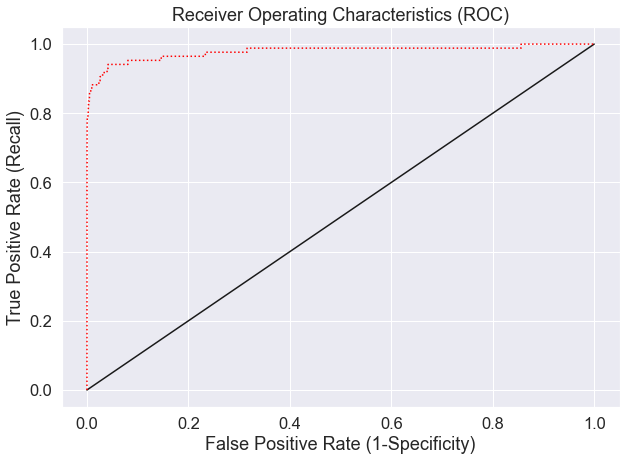

In [137]:
# Potting AUC curve
plt.figure(figsize=(10,7))
plt.plot([0,1],[0,1],'k')
plt.plot(log_reg_fpr, log_reg_tpr, ':', color='red')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristics (ROC)')

In [138]:
print('AUC score for logistic Regression with SMOTE :',roc_auc_score(Y_test,log_reg_smote_prd_tst))

AUC score for logistic Regression with SMOTE : 0.9349958525264291


### Conclusion¶
Three algorithm which are used - Random Forest, XGboost (with SMOTE and without SMOTE) and Logistic Regression (with and without SMOTE).

1. Logistic Regression yield a better AUC score with SMOTE (AUC score without SMOTE=0.7587705829406469 and AUC score with SMOTE=0.9349958525264291). Using Logistic Regression predicts most of the Fraud cases correctly but it also predicts 1367 legitimate transaction to be fraud. We can conclude that logistic regression is getting biased towards Fraud transactions. I have also tried Logistic Regression using L1 and L2 regularization but was yielding very bad results.
2. XGboost with default parameters yields slightly better result (XGB AUC score=0.9680246225947758) than RF with default parameters (RF AUC score=0.951133936923104).
3. XGboost with default parameters using SMOTE results in overall bad AUC score (AUC score without SMOTE=0.9680246225947758) than without using SMOTE (AUC score with SMOTE=0.8998499849984999). But using SMOTE predicts more Fraud trasactions correctly.
4. XGboost after parameter tuning without using SMOTE yields better AUC overall (AUC score without SMOTE=0.9831160970768358) than with using SMOTE (AUC score using SMOTE=0.9776529556069793). But using SMOTE yields better prediction for Fraud transaction correctly.
5. In this scenario, predicting fraud transaction is more important but we also need to take care about the legitimate transaction. So, we can conclude that XGboost with SMOTE and parameter tuning yields best outcome.